In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df_train = pd.read_csv(r'/content/drive/My Drive/mnist_fashion_train.csv')
df_test = pd.read_csv(r'/content/drive/My Drive/mnist_fashion_test.csv')

In [3]:
df_train.head(6)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,133,167,73,0,0,0


In [4]:
df_test.head(6)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,164,58,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6,0,0,0,2,0,1,1,0,0,...,71,12,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,145,129,62,0,0,0,0,0,0,0


In [5]:
y_train = df_train["label"].ravel()
X_train = scale(df_train.drop(["label"], axis=1))
y_test = df_test["label"].ravel()
X_test = scale(df_test.drop(["label"], axis=1))

C:\Users\Ada\AppData\Local\Temp\ipykernel_11316\3379785318.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = df_train["label"].ravel()
C:\Users\Ada\AppData\Local\Temp\ipykernel_11316\3379785318.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = df_test["label"].ravel()


Fashion Item 				 Label
AxesImage(shape=(28, 28)) 		 9


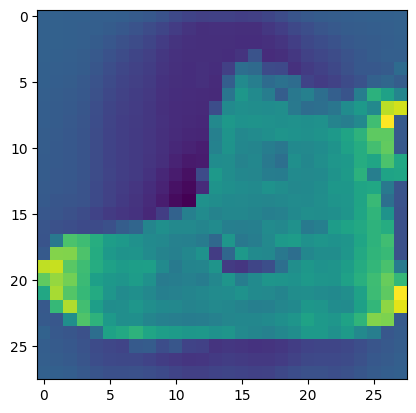

In [6]:
print('Fashion Item', '\t\t\t\t', 'Label')
print(plt.imshow(X_train[0].reshape((28,28))), '\t\t', y_train[0])

In [7]:
from sklearn.svm import SVC

mdlSvmDgt = SVC()
mdlSvmDgt.fit(X_train, y_train)
y_test_pred = mdlSvmDgt.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



SVM is a good classification method but it takes a very long time when compared to other methods. Another method that can be tried is Multi-Layer Perceptron. It will drastically reduce the training and testing time and will probably yield a better accuracy score.

In [8]:
from sklearn.neural_network import MLPClassifier

In [9]:
mdlNncDgt = MLPClassifier()
mdlNncDgt.fit(X_train, y_train)
y_test_pred = mdlNncDgt.predict(X_test)
print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.97      0.98      0.98      1000
           2       0.79      0.78      0.79      1000
           3       0.89      0.86      0.87      1000
           4       0.79      0.84      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.71      0.70      0.70      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



It took the MLP classifier quarter of the time that SV classifier took which is amazing. The scores are about the same. This doesn't mean one model performed poorly though as the metric scores are very high for both models. However, MLPC is better in this case as it took way less time than SVC. We can improve the neural network by adding more hidden layers. This will use more computation power but it will still be faster than SVC.

In [11]:
mdlDncDgt = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncDgt.fit(X_train, y_train)
y_test_pred = mdlDncDgt.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.90      0.90      0.90      1000
           4       0.81      0.82      0.81      1000
           5       0.98      0.93      0.95      1000
           6       0.71      0.70      0.70      1000
           7       0.91      0.97      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



This didn't change much, time to experiment with different layer numbers and sizes.

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (100, 50), (100, 50, 25)],
    "max_iter": [200, 300],
    "solver": ["adam"],
    "random_state": [1],
}

mlp = MLPClassifier()

grid_search = GridSearchCV(
    estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

best_mlp = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters found:", best_params)

y_pred = best_mlp.predict(X_test)

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found: {'hidden_layer_sizes': (100,), 'max_iter': 200, 'random_state': 1, 'solver': 'adam'}
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.77      0.81      0.79      1000
           3       0.89      0.86      0.87      1000
           4       0.80      0.80      0.80      1000
           5       0.95      0.96      0.95      1000
           6       0.70      0.68      0.69      1000
           7       0.95      0.95      0.95      1000
           8       0.96      0.97      0.96      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



As indicated by the above report, the model with the best parameters is {'hidden_layer_sizes': (100,), 'max_iter': 200, 'random_state': 1, 'solver': 'adam'} for the given data. The grid search does cross-validation by itself which is used to adjust certain parameters and weights of the model. Here the scores didn't change at all except for very minor and neglectable changes. Maybe trying a different method could yield better results for this particular dataset.